<a href="https://colab.research.google.com/github/Mehakpreet21/data-science-projects/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Assignment

To get full credit in this assignment you need to use only `numpy` or `numba` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 

# Question 1 (30 points)

![](points-on-line.png)

1. We monitor server faults in a data center over a period of T units of time and represents each occurring fault as a point on the line. What is the probability that k faults take place between $t_1$ and $t_2$ if $n$ total points were recorded ?  (10 points)

2. We collected a very large set of faults $n \rightarrow \infty$ over a long measurement interval $T \rightarrow \infty$  and we observed that on average faults occur with a rate of $\lambda = \frac{n}{T}$.   This [allows us](https://en.wikipedia.org/wiki/Poisson_limit_theorem) to model the probability of $k_a$ points in an interval $t_a$ as [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution).  
    Suppose that we measure $k_a$ and $k_b$ faults in two consecutive intervals of durations $t_a=(t_1, t_2)$ and $t_b=(t_2, t_3)$ respectively where $t_a+t_b < T$, write the expression of the joint probability $p(k_a \in t_a, k_b \in t_b)$. (10 points)

3. Suppose now that we need to schedule personnel to replace these servers and we are interested to use the fault data to estimate the probability of $p(k_a \in t_a | k_c \in t_c)$ where $t_c=t_a + t_b$. Write the expression of this conditional probability.  (10 points)

1. 
The mean number of faults is $\lambda$
\begin{align}
\lambda = \frac{n}{T}
\end{align}
The mean faults between $t_1$ and $t_2$ time periods is:
\begin{align}
\frac{m_1}{m_2}=\frac{T}{t_2-t_1} \\
\frac{\lambda}{\lambda_2}=\frac{T}{t_2-t_1} \\
\lambda_2=\frac{\frac{n}{T}*(t_2-t_1)}{T}\\
\lambda_2=\frac{(n*(t_2-t_1))}{T^2}
\end{align}
With the new mean being $\lambda_2$, according to the Poisson distribution, P(k) in time period ($t_2-t_1$) is:
\begin{align}
P(k;\lambda_2)=P(X=k)=\frac{\lambda_2^{k}e^{-\lambda_2}}{k!}
\\P(X=k) = \frac{(\frac{n*(t_2-t_1)}{T^2}*e^{\frac{n*(t_2-t_1)}{T^2}})}{k!}
\end{align}
2. The joint probability is $P(k_a  \epsilon  t_a, k_b  \epsilon  t_b)$
\begin{align}
P(k_a and k_b)= P(k_a)*P(k_b) \\
\\
P(k_a and k_b)=(\frac{\frac{n*(t_2-t_1)}{T^2}*e^{\frac{n*(t_2-t_1)}{T^2}}}{k_a!})*(\frac{\frac{n*(t_3-t_2)}{T^2}*e^{\frac{n*(t_3-t_2)}{T^2}}}{k_b!}) \\
P(k_a and k_b)=(\frac{(\frac{n^2*(t_3-t_2)*(t_2-t_1)}{T^4})*(e^{\frac{n*(t_3-t_1)}{T^2}})}{k_a!*k_b!})
\end{align}

3. Conditional probability $P(k_a \epsilon t_a | k_c \epsilon t_c)$ is:

$$P(k_a | k_c)= (\frac{P(k_a)*P(k_c)}{P(k_c)})\\
$$
$$P(k_a | k_c)=\frac{\lambda_2^{k_a}e^{-\lambda_2}}{k_a!}
$$

4. (since the events are independent)
$$\\P(k_a | k_c) = P(k_a) $$
$$P(k_a | k_c) = \frac{\frac{n*(t_2-t_1)}{T^2}*e^{\frac{n*(t_2-t_1)}{T^2}}}{k_a!}$$

## Question 2 (10 points)

Generate N uniform distributed over the interval [0,1] random variables $\{x_1, \dots x_N\}$. 

Compute their mean and after repeating such computation $m$ times, plot the  histogram as $N$ takes values ${1, 5, 10, 20}$. 

Provide a justification of the resultant histogram by reading about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). 

N:  1 and m:  10000


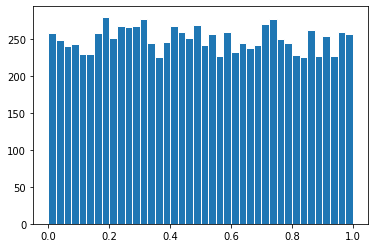

N:  5 and m:  10000


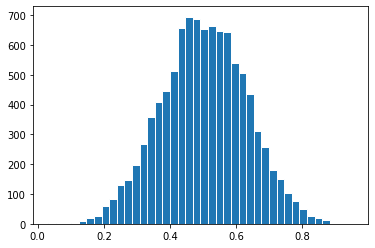

N:  10 and m:  10000


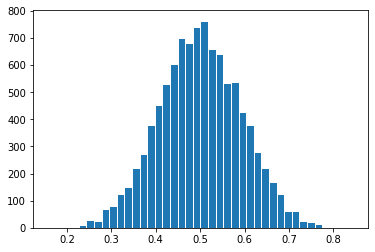

N:  20 and m:  10000


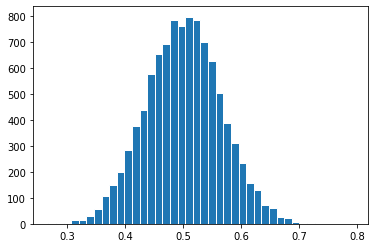

In [ ]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import random
# N values are saved in a list ls, m is assumed to be 10,000
m=10000
ns=[1,5,10,20]
for N in ns: #iterating over N values
    sample=lambda: np.mean(np.random.uniform(low=0, high=1, size=N)) #size ranges from 1,5,10,20
    x=[sample() for _ in range(m)] #sampling it over a repeated computation 10,000 times
    print("N: ", N, "and m: ", m)
    plt.hist(x, bins=40, edgecolor='white')
    plt.show()

## Question 2 (10 points) 

The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf). 

Simulate and plot the bivariate normal distribution with the shown parameters. 

You need to use the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 

In [ ]:
import numpy as np
mean=np.array([0.,2.])
covariance=np.array([[0.3,-1.],[-1.,5]]).transpose()
L=np.linalg.cholesky(covariance)
Z=np.random.normal(size=(1000,covariance.shape[0]))
X=Z.dot(L)+mean

In [ ]:
np.cov(X.T)

array([[ 3.67401273, -2.37247916],
       [-2.37247916,  1.67245944]])

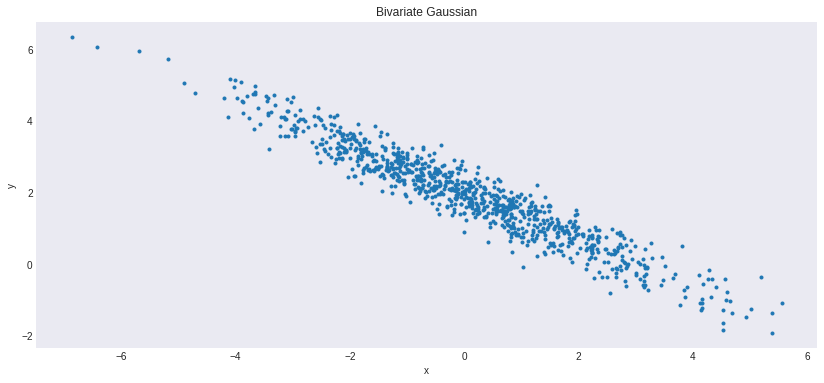

In [ ]:
mu=X.mean(0)
sig=np.cov(X.T)
x,y=np.random.multivariate_normal (X.mean(0),np.cov(X.T),size=(900,)).T
plt.plot(x,y, ".")
plt.title(f'Bivariate Gaussian')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Question 3 (25 points)

The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf). 

1. Simulate for $m=10, 100, 1000$ samples and plot the conditional distribution as given by the analytical expressions of the conditional mean and covariance matrix in Python. (5 points)
   
2. Use maximum likelihood estimation (MLE) with Stochastic Gradient Descent (SGD) to estimate the parameters of resultant distribution. (15 points)

3. Plot the estimates as a function of $m$ - include the analytical mean and variance in the plots for comparison.  (5 points)

You may use [these](http://jrmeyer.github.io/machinelearning/2017/08/18/mle.html) derivatives for implementing the SGD-based estimator. 



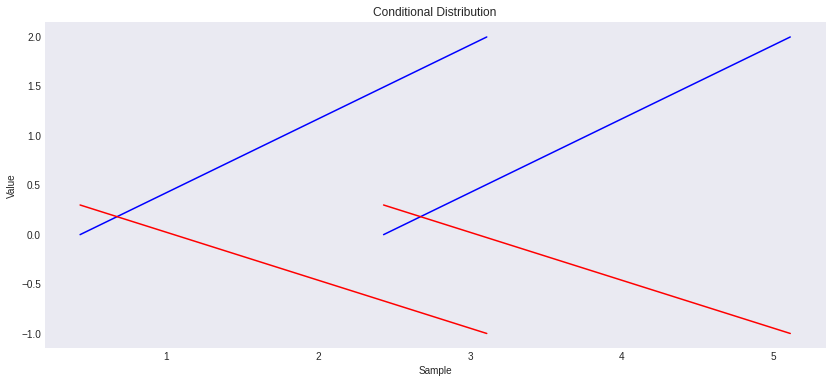

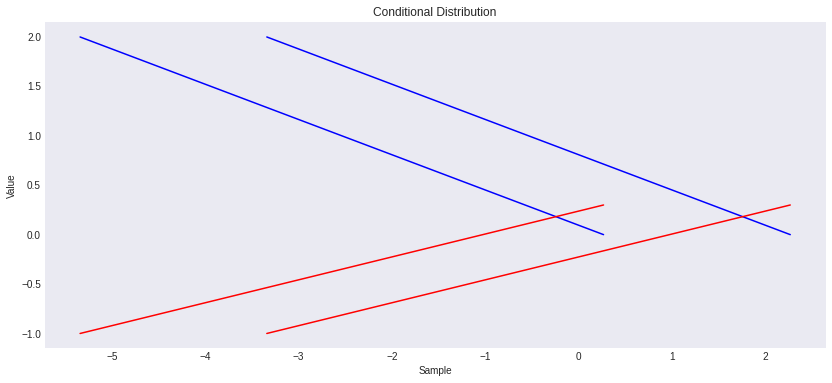

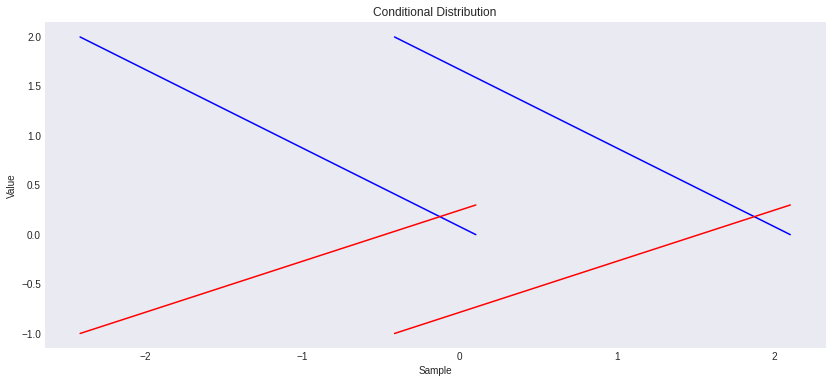

In [ ]:
def simulate_conditional(n, mu, Sigma):
  vec = []
  for i in range (n):
    if i<2:
      x = mu + Sigma[i, i] * np.random.randn()
      vec.append(x)
  return vec
def plot_conditional(vec, mu, Sigma):
  plt.plot (vec, mu, 'b')
  plt.plot(vec, Sigma[:, 0], 'r')
  plt.title ('Conditional Distribution')
  plt.xlabel ('Sample')
  plt.ylabel ( 'Value')
  plt.show()
mean=np.array([0.,2.])
covariance=np.array([[0.3,-1.],[-1.,5]])
for i in [10,100,1000]:
  vec=simulate_conditional(i,mean, covariance)
  plot_conditional(vec,mean,covariance)

## Question 4 (25 points)

![](mic-array.png)

You smartphone has an microphone array i.e. a number of sensors that are spatially separated in the circumference of the device. The array is used to do interference suppression and it does so by beaming to the direction of your voice suppressing background noises. To do so it needs to measure the spatial correlation matrix. 

The data (sound in this case) are assumed to arrive sequentially one at a time (the co-called **online** learning setting). Introduce the index $i$ to represent the ith arriving data sample $\mathbf x_i$. 

1. Write the expression of the *sample* correlation matrix (5 points)
2. Write the expression of the sample correlation matrix that can be estimated recursively (15 points). 
3. Simulate $m=50$ samples assuming a correlation matrix of your choice. Plot the elements of the estimated correlation elements (row, column) of the correlation matrix as they estimated recursively over time assuming $n=2, 4 and 8$ sensors (mics). Comment if and if so how the estimated element variance is affected by the ratio $n/m$. (5 points)

In [ ]:
# Type the python code here